In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     \ 25.9 MB 245 kB/s
     |████████████████████████████████| 10.9 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 59.2 MB/s 
     |████████████████████████████████| 102 kB 7.8 MB/s 
     |████████████████████████████████| 687 kB 56.5 MB/s 
     |████████████████████████████████| 4.7 MB 58.6 MB/s 
     |████████████████████████████████| 63 kB 567 kB/s 
     |████████████████████████████████| 812 kB 42.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=34d39bcc7b6c3ae2571a1cd05fa1167d7f75416338c572ca4e37e7847d5ce05a
  Stored in directory: /tmp/pip-ephem-wheel-cache-bu0fvnco/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=48224fd6f1f84c73b2068ee6d70373c4e67a2646b2e5e0fe43f9ac1a703f5084
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

Ahora se debe reiniciar el kernel (**Importante**)


# Ejemplo 1

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [4]:
#Importamos las librerias

# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Lectura del dataframe
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Veamos el shape
data.shape

(303, 14)

In [7]:
#Totalidad de registros por columnas
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [8]:
#Tipo de dato de cada columna
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
#Tipo de estructura del dataset
type(data)

pandas.core.frame.DataFrame

In [10]:
#Principales medidas estadisticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
#Data Profiling
profile = pandas_profiling.ProfileReport(data)
profile

Output hidden; open in https://colab.research.google.com to view.

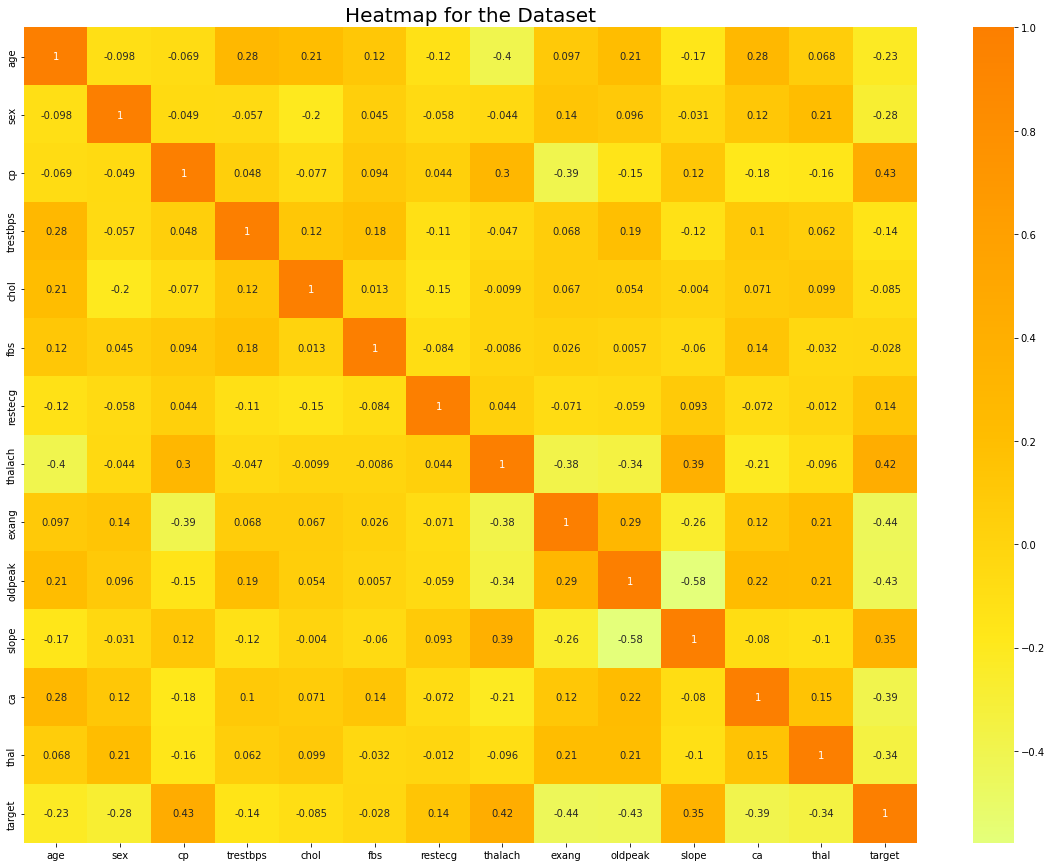

In [12]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


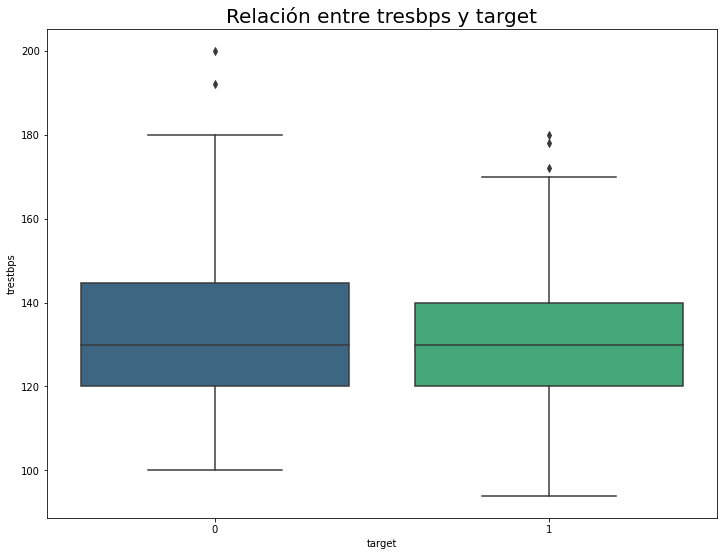

In [13]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Relación entre tresbps y target', fontsize = 20)
plt.show()

**tresbps**: presión arterial en reposo, la gráfica bivariada anterior entre tresbps (la presión arterial en reposo de un paciente) y target nos indica si el paciente padece la enfermedad cardíaca o no. La trama sugiere claramente que los pacientes que tienen más probabilidades de no sufrir la enfermedad tienen una presión arterial ligeramente mayor que los pacientes que tienen enfermedades cardíacas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


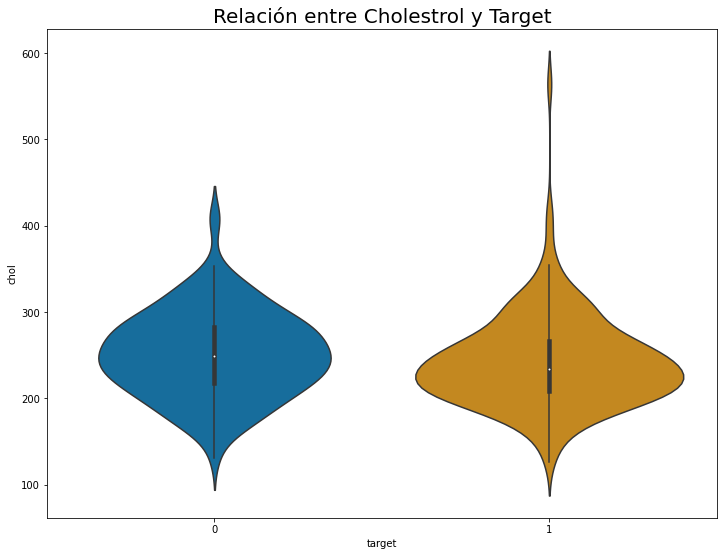

In [14]:
# cholestrol vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relación entre Cholestrol y Target', fontsize = 20, fontweight = 30)
plt.show()

El gráfico bivariado anterior entre los niveles de colesterol y el objetivo, sugiere que los pacientes con probabilidades de sufrir enfermedades cardíacas tienen niveles de colesterol más altos en comparación con los pacientes con el target 0 (que probablemente no padezcan enfermedades cardíacas).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


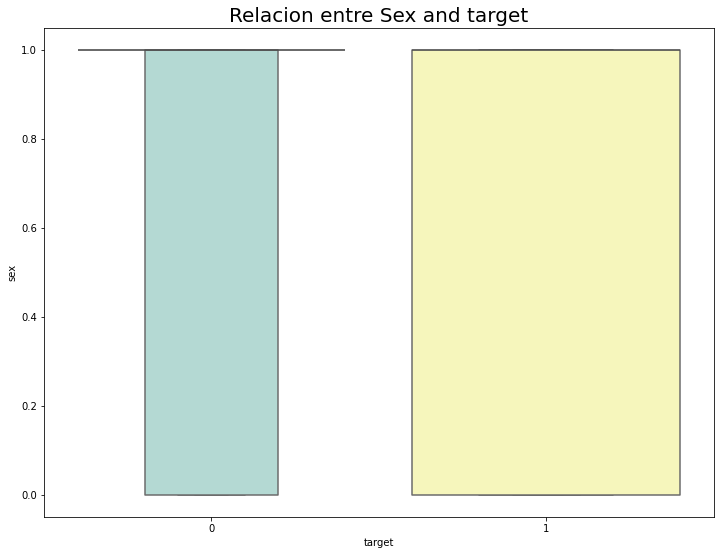

In [15]:
# Relacion entre sex and target
sns.boxenplot(data['target'], data['sex'], palette = 'Set3')
plt.title('Relacion entre Sex and target', fontsize = 20, fontweight = 30)
plt.show()

#https://seaborn.pydata.org/generated/seaborn.boxenplot.html

Text(0.5, 1.0, 'Relacion entre Sex and target')

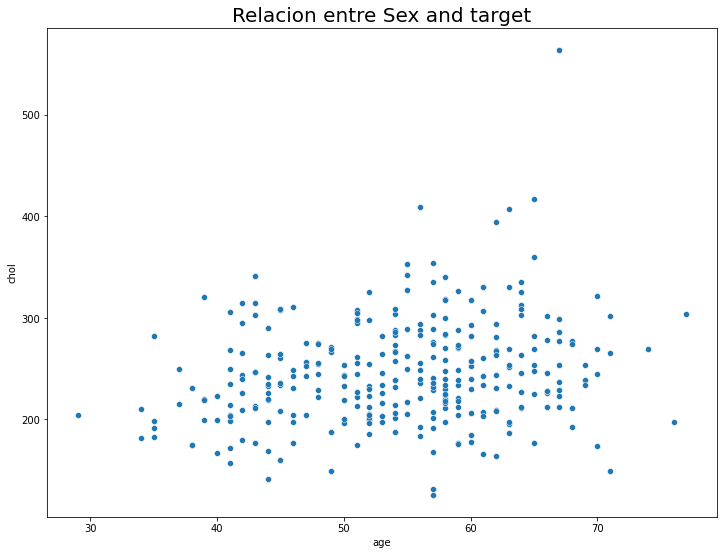

In [16]:
#Age vs chol
sns.scatterplot(x="age", y="chol", data=data)
plt.title('Relacion entre Sex and target', fontsize = 20, fontweight = 30)

Efectivamente se observa una relación entre la edad y la variable colesterol de tipo positiva, esto significa que a mayor edad también se ve incrementado el colesterol de las personas.

# Ejemplo 2

In [17]:
#Importemos el archivo
vg_df = pd.read_csv('Video_Games.csv')

In [18]:
#Head del df
vg_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Veamos el shape
vg_df.shape

(16719, 16)

In [20]:
#Totalidad de registros por columnas
vg_df.count()

Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64

In [21]:
#Tipo de dato de cada columna
vg_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [22]:
#Principales medidas estadisticas
vg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [23]:
#Data Profiling
profile = pandas_profiling.ProfileReport(vg_df)
profile

Output hidden; open in https://colab.research.google.com to view.

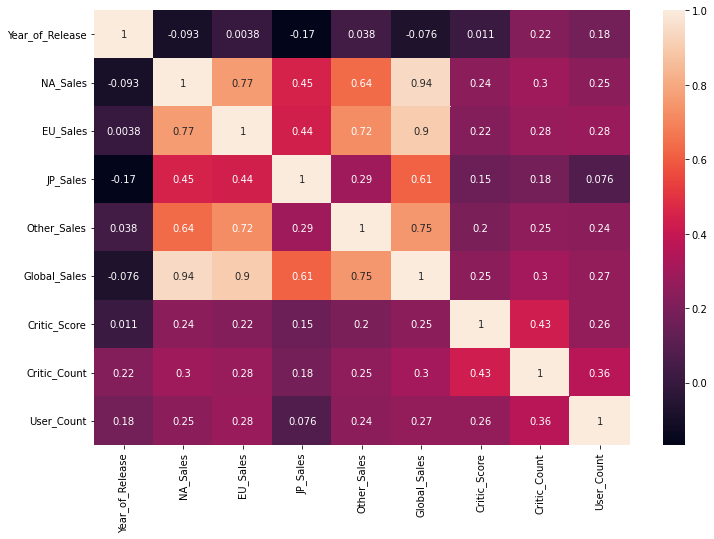

In [24]:
#Correlaciones
plt.figure(figsize=(12, 8))

vg_corr = vg_df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [25]:
#Ejemplo: Categórica vs. categórica
pd.crosstab(vg_df.Genre, vg_df.Rating)

Rating,AO,E,E10+,EC,K-A,M,RP,T
Genre,,,,,,,,
Action,1,416,481,1,0,608,0,681
Adventure,0,162,68,2,0,99,0,115
Fighting,0,8,19,0,0,49,0,362
Misc,0,457,167,5,1,13,0,239
Platform,0,358,144,0,0,3,0,64
Puzzle,0,289,43,0,0,0,0,10
Racing,0,585,96,0,0,18,1,172
Role-Playing,0,84,111,0,0,162,0,420
Shooter,0,48,58,0,0,565,0,348


In [26]:
pd.crosstab(vg_df.Genre, vg_df.Rating, normalize=True) #Agregamos los valores en relativo

Rating,AO,E,E10+,EC,K-A,M,RP,T
Genre,,,,,,,,
Action,0.000101,0.041809,0.048342,0.000101,0.000000,0.061106,0.000000,0.068442
Adventure,0.000000,0.016281,0.006834,0.000201,0.000000,0.009950,0.000000,0.011558
Fighting,0.000000,0.000804,0.001910,0.000000,0.000000,0.004925,0.000000,0.036382
Misc,0.000000,0.045930,0.016784,0.000503,0.000101,0.001307,0.000000,0.024020
Platform,0.000000,0.035980,0.014472,0.000000,0.000000,0.000302,0.000000,0.006432
Puzzle,0.000000,0.029045,0.004322,0.000000,0.000000,0.000000,0.000000,0.001005
Racing,0.000000,0.058794,0.009648,0.000000,0.000000,0.001809,0.000101,0.017286
Role-Playing,0.000000,0.008442,0.011156,0.000000,0.000000,0.016281,0.000000,0.042211
Shooter,0.000000,0.004824,0.005829,0.000000,0.000000,0.056784,0.000000,0.034975


In [27]:
#Análisis de numérica vs. categórica
vg_df.groupby('Genre')['Global_Sales'].mean()

Genre
Action          0.517884
Adventure       0.182417
Fighting        0.527067
Misc            0.458960
Platform        0.932523
Puzzle          0.419000
Racing          0.583587
Role-Playing    0.622933
Shooter         0.795873
Simulation      0.446705
Sports          0.567291
Strategy        0.255490
Name: Global_Sales, dtype: float64

In [28]:
vg_df.groupby('Genre')['Critic_Score'].mean()

Genre
Action          66.629101
Adventure       65.331269
Fighting        69.217604
Misc            66.619503
Platform        68.058350
Puzzle          67.424107
Racing          67.963612
Role-Playing    72.652646
Shooter         70.181144
Simulation      68.619318
Sports          71.968174
Strategy        72.086093
Name: Critic_Score, dtype: float64

In [29]:
vg_df.groupby('Genre')['EU_Sales'].mean()

Genre
Action          0.154045
Adventure       0.048764
Fighting        0.118174
Misc            0.121566
Platform        0.225619
Puzzle          0.086224
Racing          0.189359
Role-Playing    0.125807
Shooter         0.239864
Simulation      0.129886
Sports          0.160473
Strategy        0.066135
Name: EU_Sales, dtype: float64

In [30]:
vg_df.groupby('Genre')['EU_Sales'].mean().sort_values(ascending=False) #Ordenamiento descendiente

Genre
Shooter         0.239864
Platform        0.225619
Racing          0.189359
Sports          0.160473
Action          0.154045
Simulation      0.129886
Role-Playing    0.125807
Misc            0.121566
Fighting        0.118174
Puzzle          0.086224
Strategy        0.066135
Adventure       0.048764
Name: EU_Sales, dtype: float64

In [31]:
vg_df.groupby('Genre')['Critic_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,1890.0,66.629101,14.206877,19.0,57.00,68.0,77.0,98.0
Adventure,323.0,65.331269,13.920756,17.0,57.00,66.0,76.0,93.0
Fighting,409.0,69.217604,14.280079,23.0,61.00,72.0,80.0,98.0
Misc,523.0,66.619503,14.152649,19.0,58.50,69.0,77.0,93.0
Platform,497.0,68.058350,13.213760,19.0,59.00,69.0,77.0,97.0
Puzzle,224.0,67.424107,12.735444,25.0,60.75,70.0,76.0,90.0
Racing,742.0,67.963612,14.248234,13.0,59.00,69.0,79.0,96.0
Role-Playing,737.0,72.652646,11.999835,35.0,65.00,74.0,82.0,96.0
Shooter,944.0,70.181144,14.552571,22.0,61.00,73.0,81.0,97.0


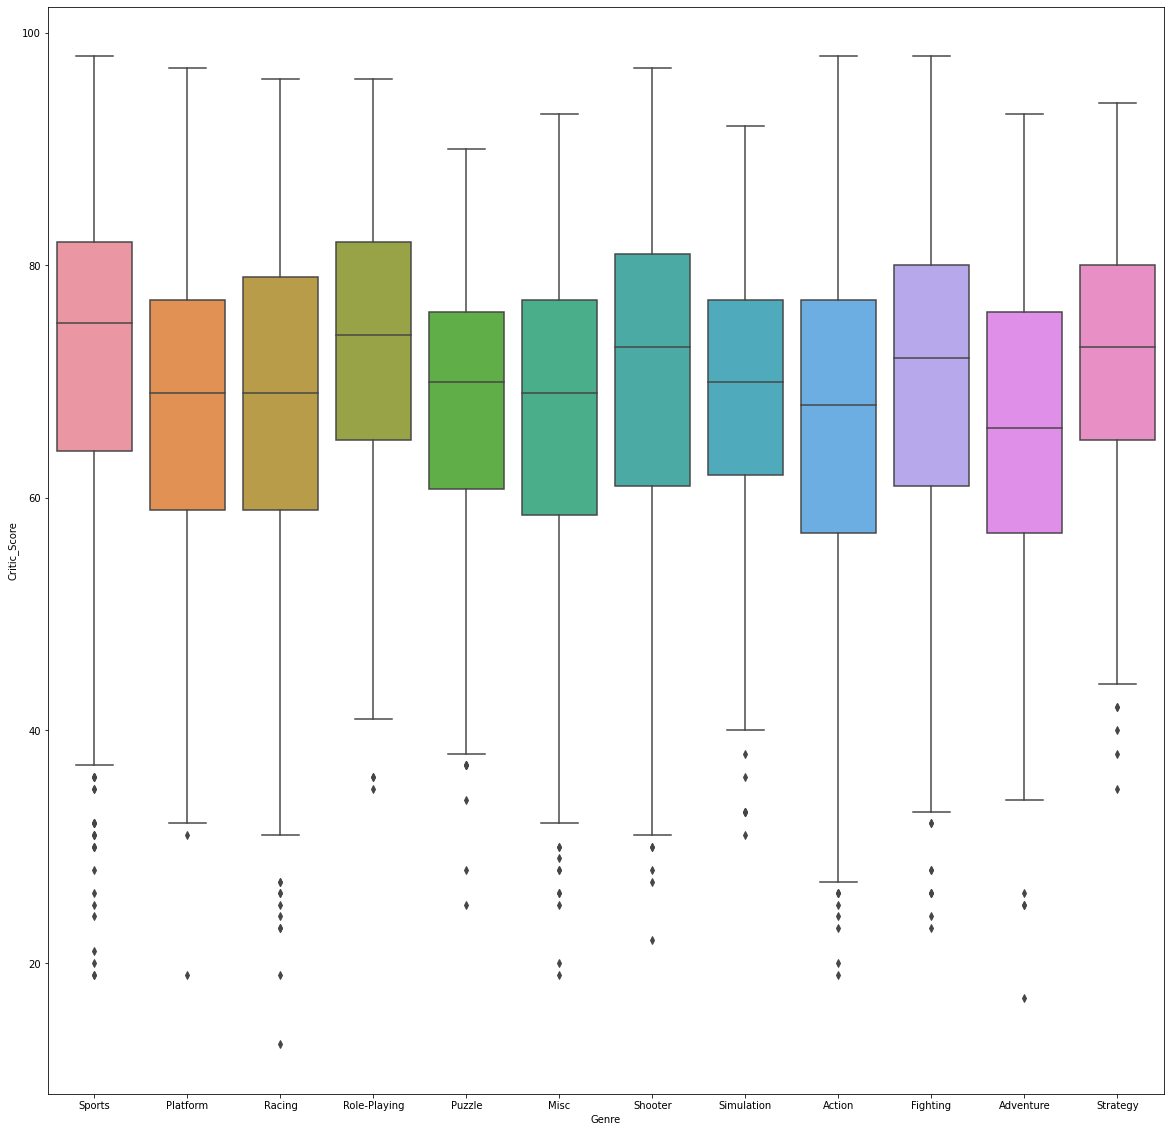

In [32]:
#Boxplot
plt.figure(figsize=(20,20)) #defino el tamaño del grafico
sns.boxplot(y = 'Critic_Score', x = 'Genre', data = vg_df)
plt.show()

# Ejemplo 3

In [33]:
import pandas as pd
pokemon = pd.read_csv("Pokemon.csv", index_col=0)

In [34]:
#Head del df
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [35]:
#Veamos el shape
pokemon.shape

(800, 12)

In [36]:
#Totalidad de registros por columnas
pokemon.count()

Name          800
Type 1        800
Type 2        414
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

In [37]:
#Tipo de dato de cada columna
pokemon.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [38]:
#Principales medidas estadisticas
pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0


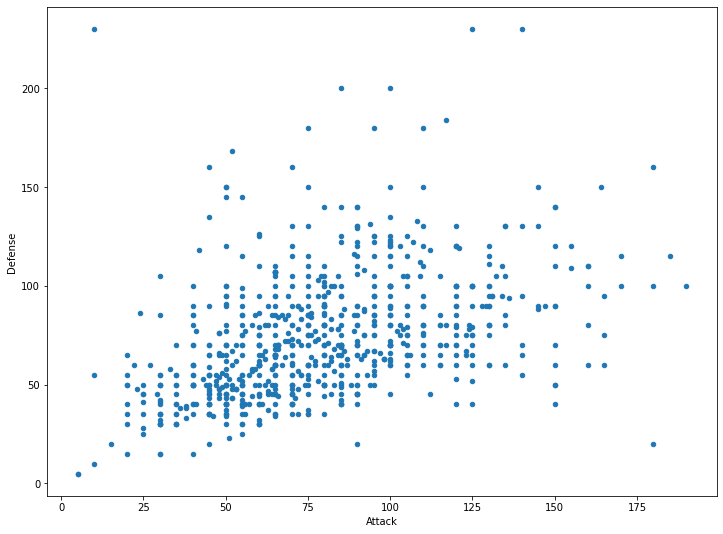

In [39]:
#Scatterplot
pokemon.plot.scatter(x='Attack', y='Defense')

Hexplot

Una gráfica hexagonal agrega puntos en el espacio en hexágonos y luego colorea esos hexágonos según los valores dentro de ellos.

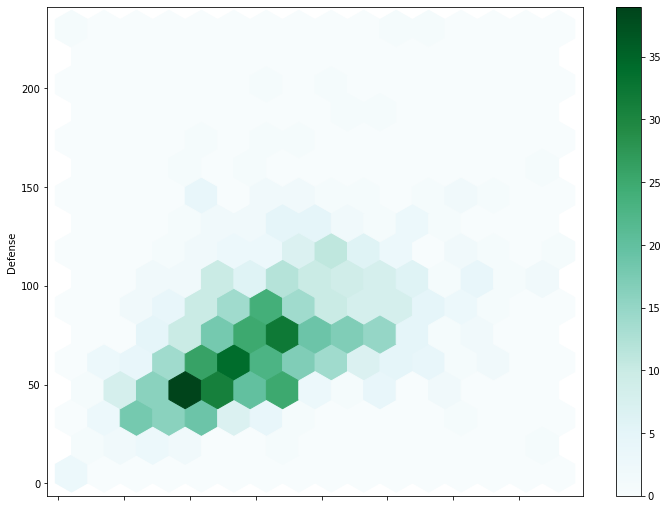

In [40]:
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=15)

In [41]:
#Filtramos la data y realizamos una agrupacion
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]
pokemon_stats_legendary

Attack     Defense
Legendary Generation                        
False     1            74.981250   70.175000
          2            70.693069   72.118812
          3            76.971831   69.901408
          4            79.620370   75.074074
          5            78.246667   70.486667
          6            70.459459   74.013514
True      1           120.833333   89.166667
          2            99.000000   99.000000
          3           118.333333  107.222222
          4           109.846154  103.538462
          5           120.266667   90.733333
          6           125.250000  101.375000

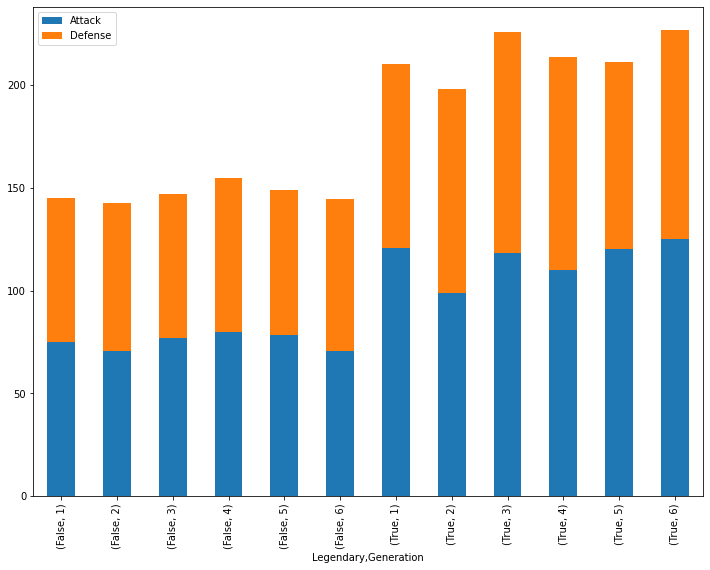

In [42]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [43]:
#Generamos otro dataset
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


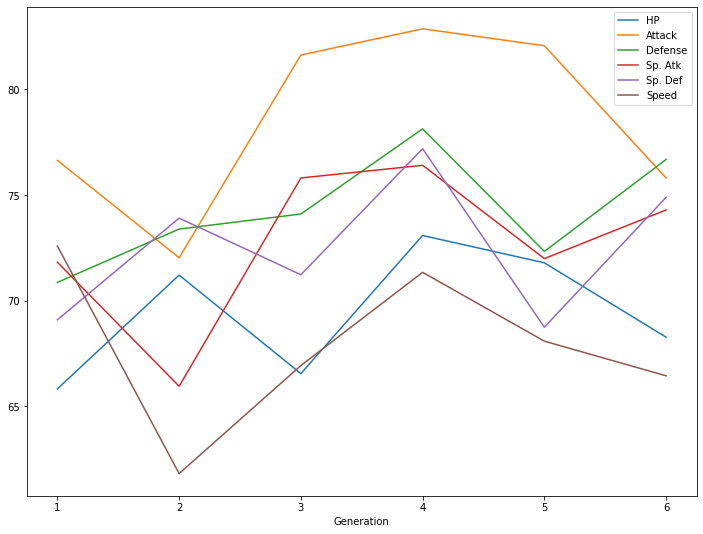

In [44]:
pokemon_stats_by_generation.plot.line()